In [1]:
import numpy as np
from matplotlib import pyplot as plt
from utils import red_transparent_blue
import sys
import torch

sys.path.append('E:/Projects/XAI/BHEM')
sys.path.append('/run/media/xiangyu/Data/Projects/XAI/BHEM')

from utils import red_transparent_blue

import torch.nn.functional as F

In [2]:
from model import Cnn, getClassifier
from dataset import handwriting
torch.manual_seed(0)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
cnn = getClassifier(Cnn, device, f_params='./MINST.pkl')
# %% Load MINST dataset
mnist = handwriting('mnist_784', normalize=True)

In [3]:
img_ID = 46

In [4]:
exp_result = np.load(f'./result/bhem/result_array_{img_ID}.npy', allow_pickle=True)
y = mnist.y[img_ID]
y

8

In [5]:
exp_result.shape

(1, 10, 14, 14)

In [6]:
for i in range(10):
    print(exp_result[:,i].sum())

-0.07068607451302969
-0.20390185887514556
-0.009500192091689397
-0.3453378160997749
-0.051612700078630266
-0.12972012808522435
-0.06735555189045749
-0.1671182573722312
1.0945090197614116
-0.049276403667520785


In [7]:
exp_result.sum()

3.708770779375925e-08

In [8]:
exp_result[0,y].sum()

1.0945090197614116

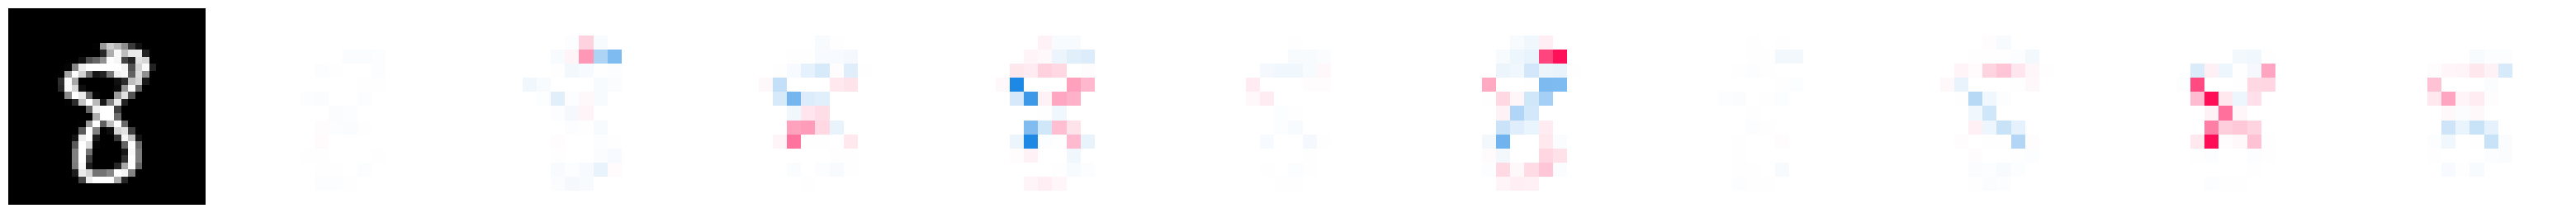

In [9]:
exp_result = np.array(exp_result, dtype=float)  # Convert to numeric type

plt.figure(figsize=(40, 10))
for i in range(11):
    plt.subplot(1, 11, i+1)
    if i == 0:
        plt.imshow(mnist.X[img_ID].reshape(28, 28), cmap='gray')
        plt.axis('off')
        continue
    else:
        plt.imshow(exp_result[0][i-1], cmap=red_transparent_blue, vmin=-np.nanpercentile(exp_result[0], 99.9),vmax=np.nanpercentile(exp_result[0], 99.9))
        plt.axis('off')

In [10]:
resized_images = F.interpolate(torch.tensor(exp_result), size=(28, 28), mode='bilinear', align_corners=False).numpy()/4

In [11]:
resized_images[0,y].sum(), exp_result[0,y].sum()

(1.0945090197614118, 1.0945090197614116)

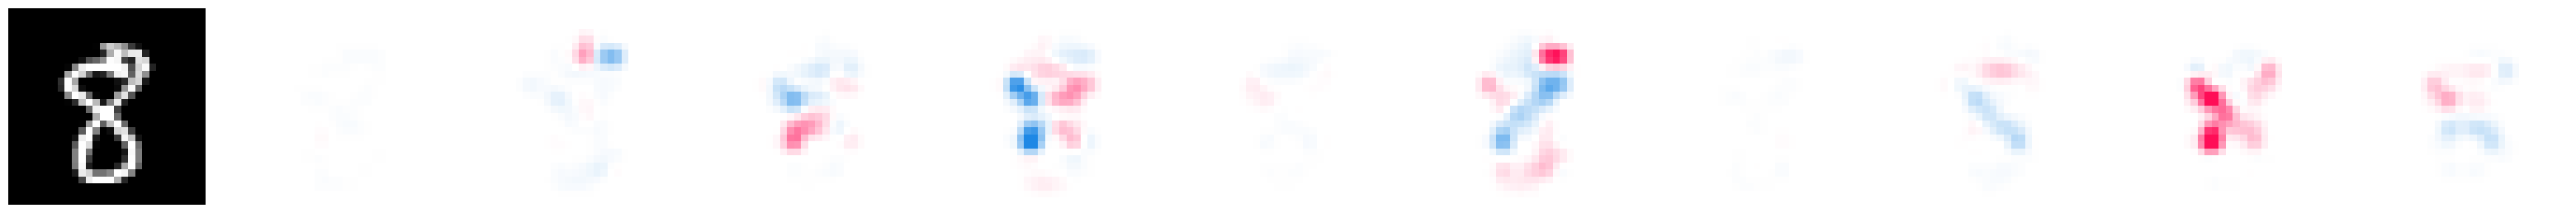

In [12]:
plt.figure(figsize=(40, 10))
for i in range(11):
    plt.subplot(1, 11, i+1)
    if i == 0:
        plt.imshow(mnist.X[img_ID].reshape(28, 28), cmap='gray')
        plt.axis('off')
        continue
    else:
        plt.imshow(resized_images[0][i-1], cmap=red_transparent_blue, vmin=-np.nanpercentile(resized_images[0], 99.9),vmax=np.nanpercentile(resized_images[0], 99.9))
        plt.axis('off')